Q1)
    
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.

Task:
    
1.fitting it to the periodic function

2.plot the fit

Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [27]:
# defining periodic function
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

a_max, b_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
a_min, b_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])
print(a_max)
print(a_min)

[ 39.88861733 -10.59083161   1.33370157]
[25.55626462 -7.74472962  0.93101294]


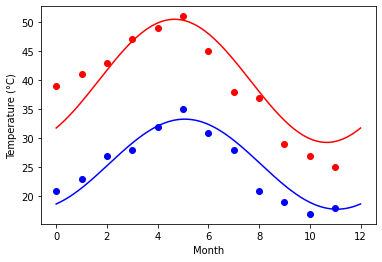

In [28]:
#plot the fit
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro') # ro = red circle marker
plt.plot(days, yearly_temps(days, *a_max), 'r-') # r- = red solid line
plt.plot(months, temp_min, 'bo') # bo = blue circle marker
plt.plot(days, yearly_temps(days, *a_min), 'b-') # b- = blue solid line
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

plt.show()

Q2)

Matplotlib:
    
This assignment is for visualization using matplotlib:
    
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
    
titanic = pd.read_csv(url)

Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [31]:
#read data
url=r'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'

titanic = pd.read_csv(url)

In [33]:
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [77]:
# 01. Create a pie chart presenting the male/female proportion
sex = titanic.sex.value_counts()
sex

male      843
female    466
Name: sex, dtype: int64

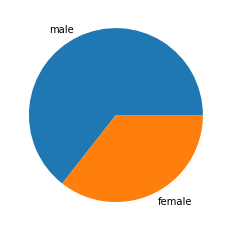

In [80]:
l = ['male','female']
sex = titanic.sex.value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(sex,labels=l )
plt.show()

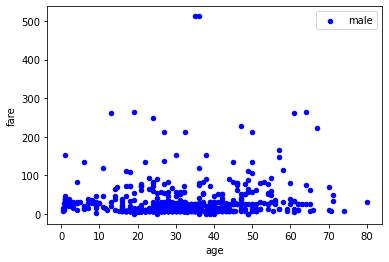

In [111]:
# 02. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
a = titanic[titanic.sex == 'male'].plot.scatter('age', 'fare', color='b', label='male')

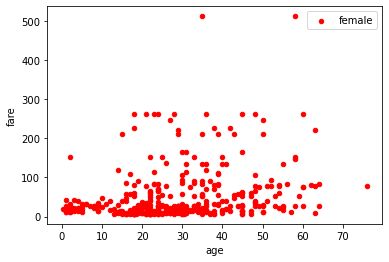

In [112]:
b = titanic[titanic.sex == 'female'].plot.scatter('age', 'fare', color='r', label='female')


<Figure size 432x288 with 0 Axes>

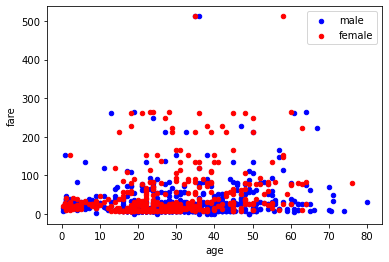

In [113]:
plt.figure()
a = titanic[titanic.sex == 'male'].plot.scatter('age', 'fare', color='b', label='male')
titanic[titanic.sex == 'female'].plot.scatter('age', 'fare', color='r', label='female', ax=a)